# 1일차 A, B rest_play 군집화

In [47]:
import pandas as pd
import numpy as np

cB_ab=pd.read_csv("D:/Dataset/f_Nirs datasets/1-6 A,C GLM/1st level data/cB.csv")
cB_ab.drop(['Group','Subject'],axis=1,inplace=True)
day1_cB=cB_ab[0:6]
day1_cB.fillna(cB_ab['Ch01'].mean(),inplace=True)


C:\Users\bml05\AppData\Local\Temp\ipykernel_25340\3178976050.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day1_cB.fillna(cB_ab['Ch01'].mean(),inplace=True)


In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


std=StandardScaler()
day1_cB=std.fit_transform(day1_cB)
pca=PCA(n_components=0.95,random_state=1)
day1_pca=pca.fit_transform(day1_cB)
day1_pca=std.fit_transform(day1_pca)
print(day1_pca)

[[ 0.57742699 -0.98774802 -0.83122315]
 [ 1.62499199  1.35748527  0.71877311]
 [-1.06608415  0.79459357 -0.48175269]
 [-0.64767768 -0.97117638  1.90717856]
 [ 0.57742699 -0.98774802 -0.83122315]
 [-1.06608415  0.79459357 -0.48175269]]


[[0]
 [0]
 [0]
 [1]
 [0]
 [0]]


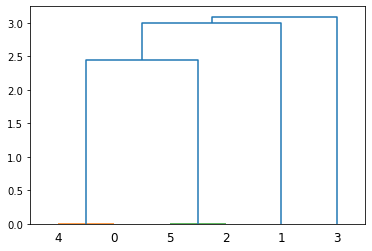

In [49]:
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree

links=linkage(day1_pca,'average')
dendrogram(links,orientation='top',distance_sort='descending',show_leaf_counts=True)
cluster=cut_tree(links,2)
print(cluster)

In [50]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
kmeans=KMeans(n_clusters=2,random_state=2)
kmeans.fit_predict(day1_pca)
kmeans.labels_

array([1, 1, 1, 0, 1, 1])

# 설문조사 클러스터링

In [51]:
self_report=pd.read_csv("D:/Dataset/f_Nirs datasets/k1~12_self-report_dataset.csv")
day1=self_report[0:6]
day1.drop(['subjectkey','date','age','sex','right_handed','piano_year','piano_major','impro_experience','condition','post_B_IF_10','pre_SE_10','pre_SE_11'
           ,'post_B_diff','post_B_SE_10','post_B_SE_11'],axis=1,inplace=True)
for i in range(1,10):
    day1.drop(['pre_SE_0'+str(i)],axis=1,inplace=True)
    day1.drop(['post_B_IF_0'+str(i)],axis=1,inplace=True)
    day1.drop(['post_B_SE_0'+str(i)],axis=1,inplace=True)
day1

C:\Users\bml05\AppData\Local\Temp\ipykernel_25340\12142219.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day1.drop(['subjectkey','date','age','sex','right_handed','piano_year','piano_major','impro_experience','condition','post_B_IF_10','pre_SE_10','pre_SE_11'
C:\Users\bml05\AppData\Local\Temp\ipykernel_25340\12142219.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day1.drop(['pre_SE_0'+str(i)],axis=1,inplace=True)
C:\Users\bml05\AppData\Local\Temp\ipykernel_25340\12142219.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

,post_A_SE_01,post_A_SE_02,post_A_SE_03,post_A_SE_04,post_A_SE_05,post_A_SE_06,post_A_SE_07,post_A_SE_08,post_A_SE_09,post_A_SE_10,...,post_C_IF_02,post_C_IF_03,post_C_IF_04,post_C_IF_05,post_C_IF_06,post_C_IF_07,post_C_IF_08,post_C_IF_09,post_C_IF_10,post_C_diff
0,3,4,4,5,3,4,3,4,5,5,...,4,4,4,4,4,4,4,5,4,4
1,3,4,5,5,3,3,3,5,4,4,...,5,5,4,5,4,4,4,5,3,3
2,4,4,4,5,3,4,3,4,4,4,...,5,5,5,5,5,5,5,5,5,3
3,3,4,4,4,3,4,3,4,5,5,...,5,5,4,5,5,5,5,5,5,3
4,4,5,4,5,4,3,3,3,5,5,...,5,5,4,4,5,5,5,5,5,3
5,3,4,4,5,3,3,2,4,5,4,...,4,4,4,4,4,5,5,2,3,4


[[ 1.33487069 -0.262323   -1.15512858  0.56000032 -1.22530995]
 [ 0.66664976  1.6248668  -0.29771498 -0.70605881  1.1524898 ]
 [-1.10773023  0.80334347  0.44326173  1.69989155 -0.20361915]
 [-1.12678245  0.05316371  0.08622755 -1.51337674 -1.19573851]
 [-0.67402608 -1.41011973 -0.94310683  0.03944516  1.29083105]
 [ 0.90701831 -0.80893126  1.86646112 -0.07990148  0.18134676]]


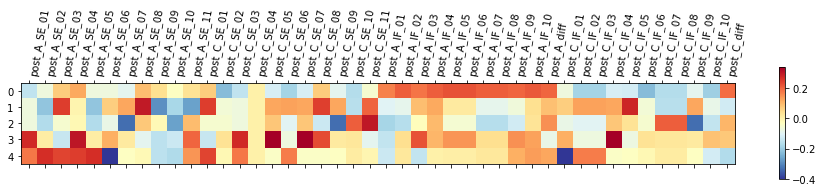

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

std=StandardScaler()
day1_std=std.fit_transform(day1)
pca=PCA(n_components=0.95,random_state=1)
day1_pca=pca.fit_transform(day1_std)
plt.matshow(pca.components_,cmap='RdYlBu_r')
plt.xticks(range(len(day1.columns)),day1.columns,rotation=80,ha='left')
plt.colorbar()
day1_pca=std.fit_transform(day1_pca)
print(day1_pca)

In [55]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
kmeans=KMeans(n_clusters=2,random_state=2)
kmeans.fit_predict(day1_pca)
print(kmeans.labels_)
for i in range(5):
    print("\nprinciple component difference "+str(i))
    print(kmeans.cluster_centers_[0][i]-kmeans.cluster_centers_[1][i])

[0 1 0 1 0 0]

principle component difference 0
0.34509951901917185

principle component difference 1
-1.258522878792554

principle component difference 2
0.15861557659092482

principle component difference 3
1.6645766596831297

principle component difference 4
0.03243652924284858


[[0]
 [0]
 [0]
 [0]
 [1]
 [0]]


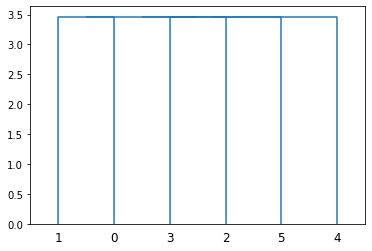

In [54]:
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree

links=linkage(day1_pca,'average')
dendrogram(links,orientation='top',distance_sort='descending',show_leaf_counts=True)
cluster=cut_tree(links,2)
print(cluster)